In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import plotly.express as px

x = loadmat('exo9.mat')['x']

In [32]:
# Représentation des données selon les trois premières features.
fig = px.scatter_3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], width=800, height=500, size=np.ones(x.shape[0]))
fig.show()

In [ ]:
# Moyenne des échantillons 
m = np.mean(x, axis=0) # m est un vecteur de dimension D, contenant la moyenne des échantillons selon chaque dimension.

# Matrice de variance-covariance 
N = x.shape[0]
A = (x - m).T
S = (1 / (N-1)) * A @ A.T
S2 = np.cov(x.T)

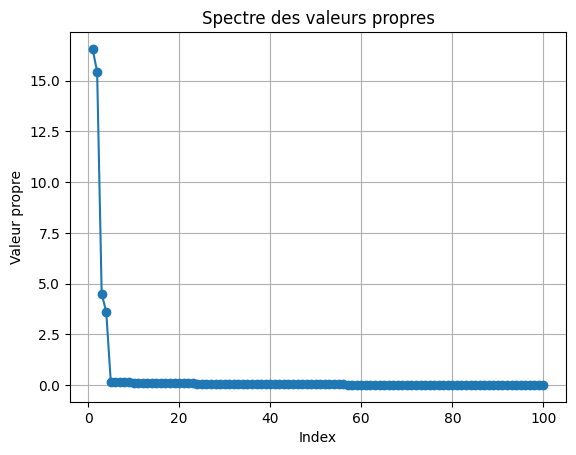

In [34]:
# Calcul de la SVD
U, L, V = np.linalg.svd(S, full_matrices=False)

# Spectre des valeurs propres
l = L

# Tracé du spectre des valeurs propres
plt.figure()
plt.plot(range(1, len(l) + 1), l, 'o-')
plt.grid(True)
plt.title('Spectre des valeurs propres')
plt.xlabel('Index')
plt.ylabel('Valeur propre')
plt.show()

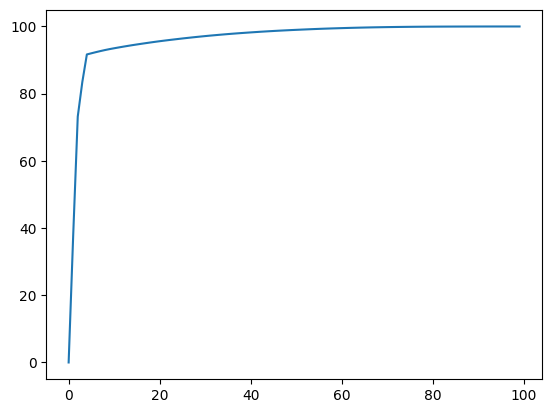

[ 0.         37.86808865 73.18055166 83.44547624 91.67753438 92.02538162]


In [35]:
# Pourcentage de variance expliqué 
v = np.zeros(x.shape[1])
for d in range(x.shape[1]):
    v[d] = 100 * np.sum(l[:d])/ np.sum(l)

plt.figure()
plt.plot(np.arange(0, x.shape[1], 1), v)
plt.show()
print(v[:6])

On voit que le pourcentage de variance expliquée dépasse les 80% pour $d=4$. Les 3-4 premières dimensions sont suffisantes pour avoir une bonne représentation. 

In [43]:
# Projection des données sur les sous-espaces associées aux trois plus grandes valeurs propres

# Extraction des trois vecteurs propres
VV = U[:, :3]

# Projection des données centrées (xk-u)
y = VV.T @ A

# Représentation des données.
fig = px.scatter_3d(x=y[0, :], y=y[1, :], z=y[2, :], width=800, height=500, size=np.ones(x.shape[0]))
fig.show()

(-8.830419234458343, 8.010361210303419, -6.900917065329877, 8.120631071076597)

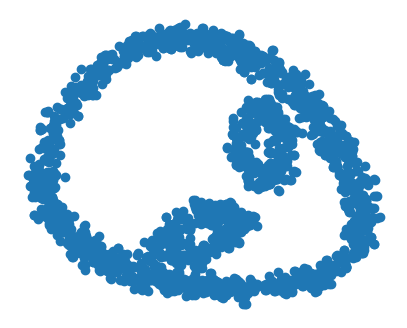

In [50]:
plt.figure(figsize=(5,4))
plt.scatter(y[0, :], y[1, :])
plt.box(False)
plt.axis('off')